old lens data:
[ 5.00000019  2.42254736  0.26284994  2.53192999]
analytical expected minimum waist:
0.236822555321
0
1
new values
[ 5.00000019  2.42249979  0.2628537   2.53186545]


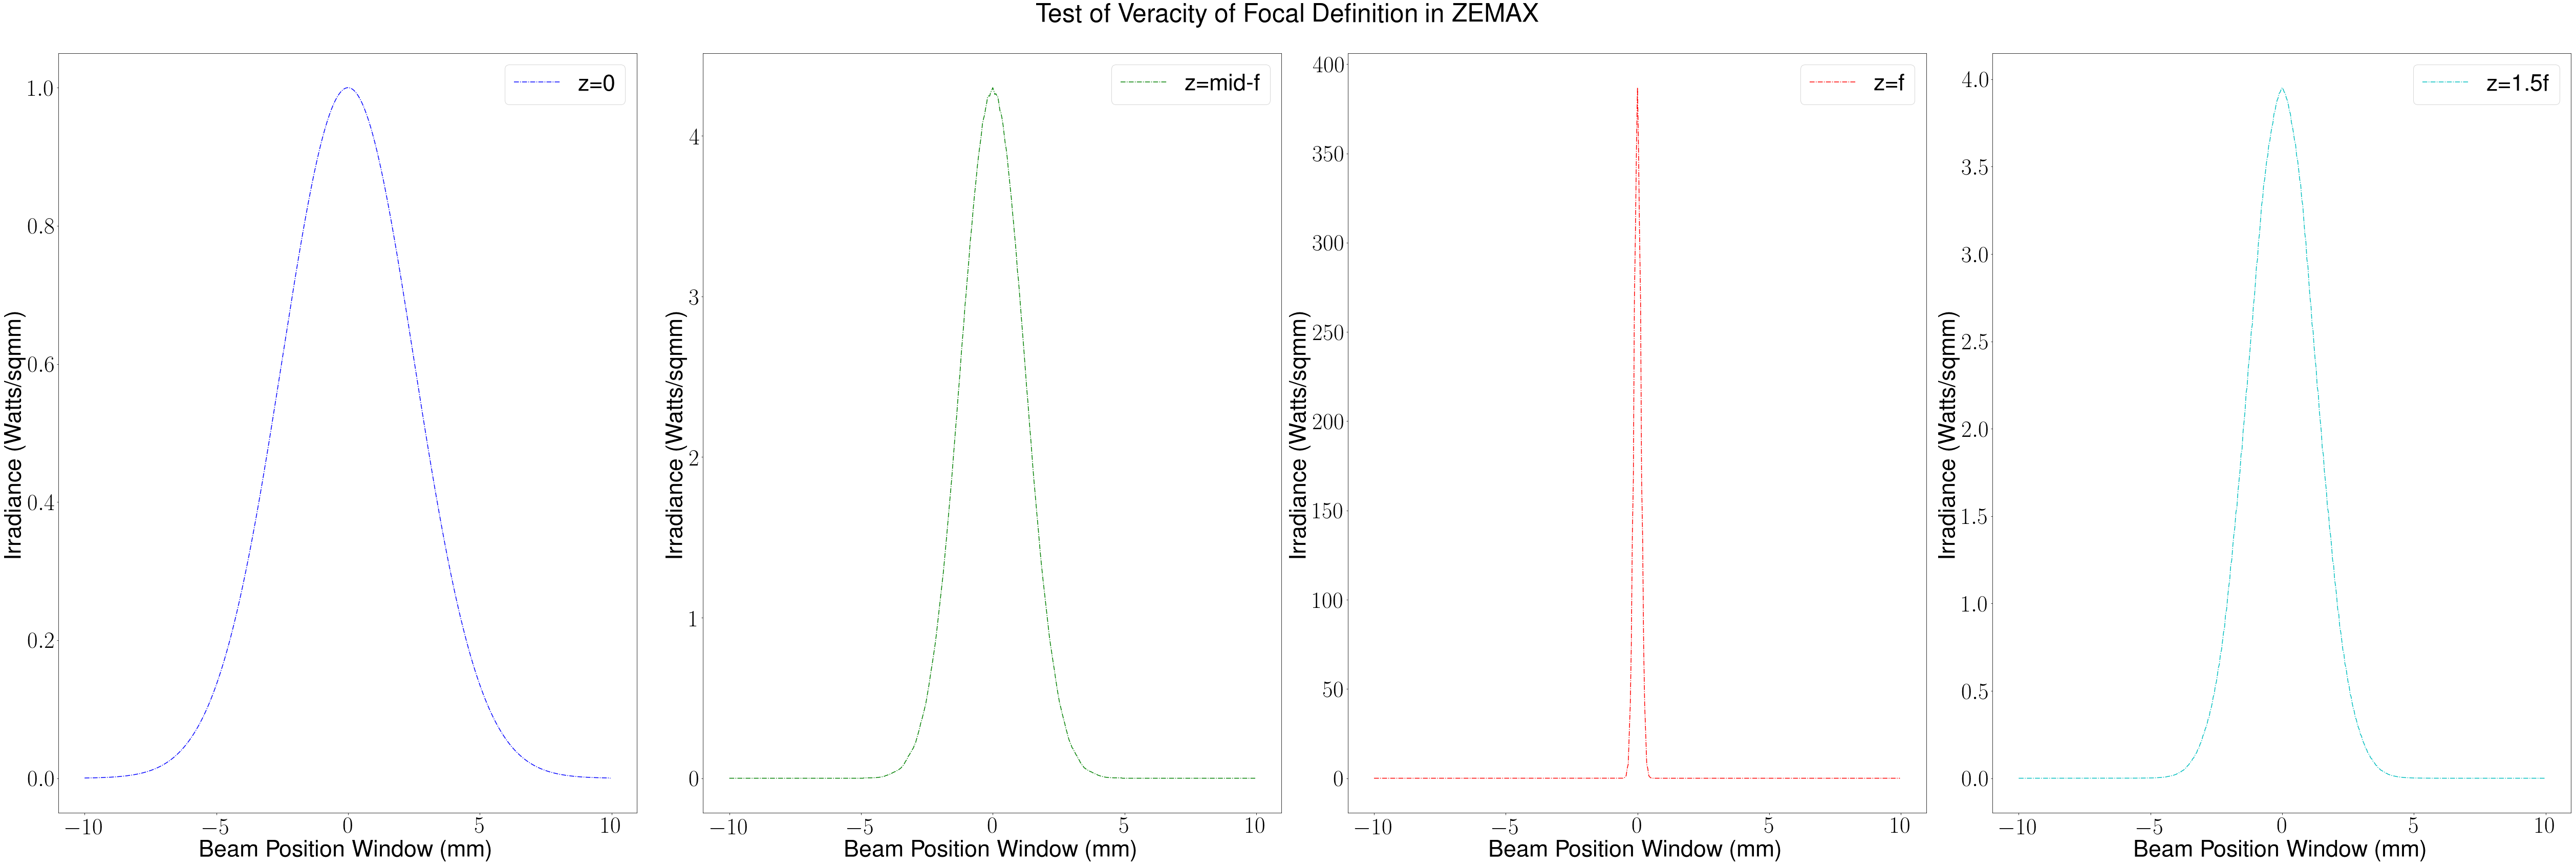

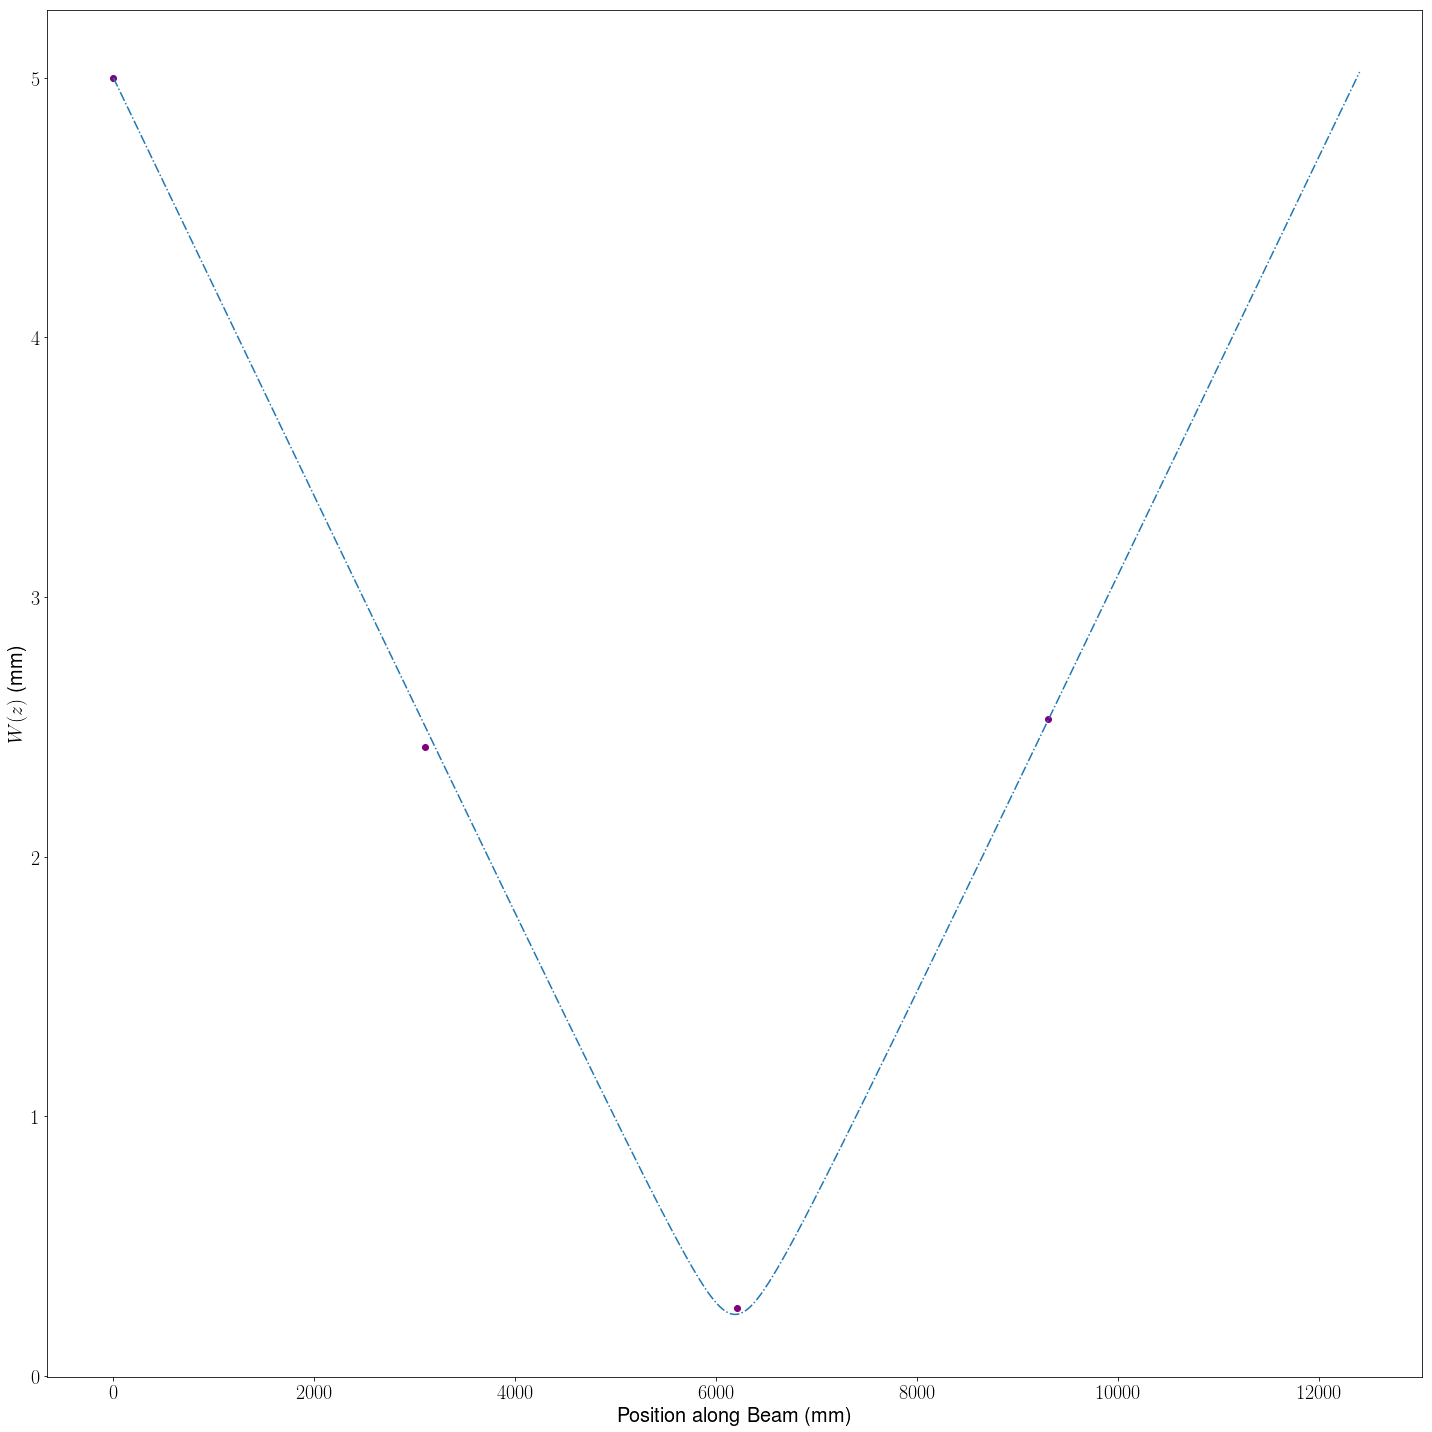

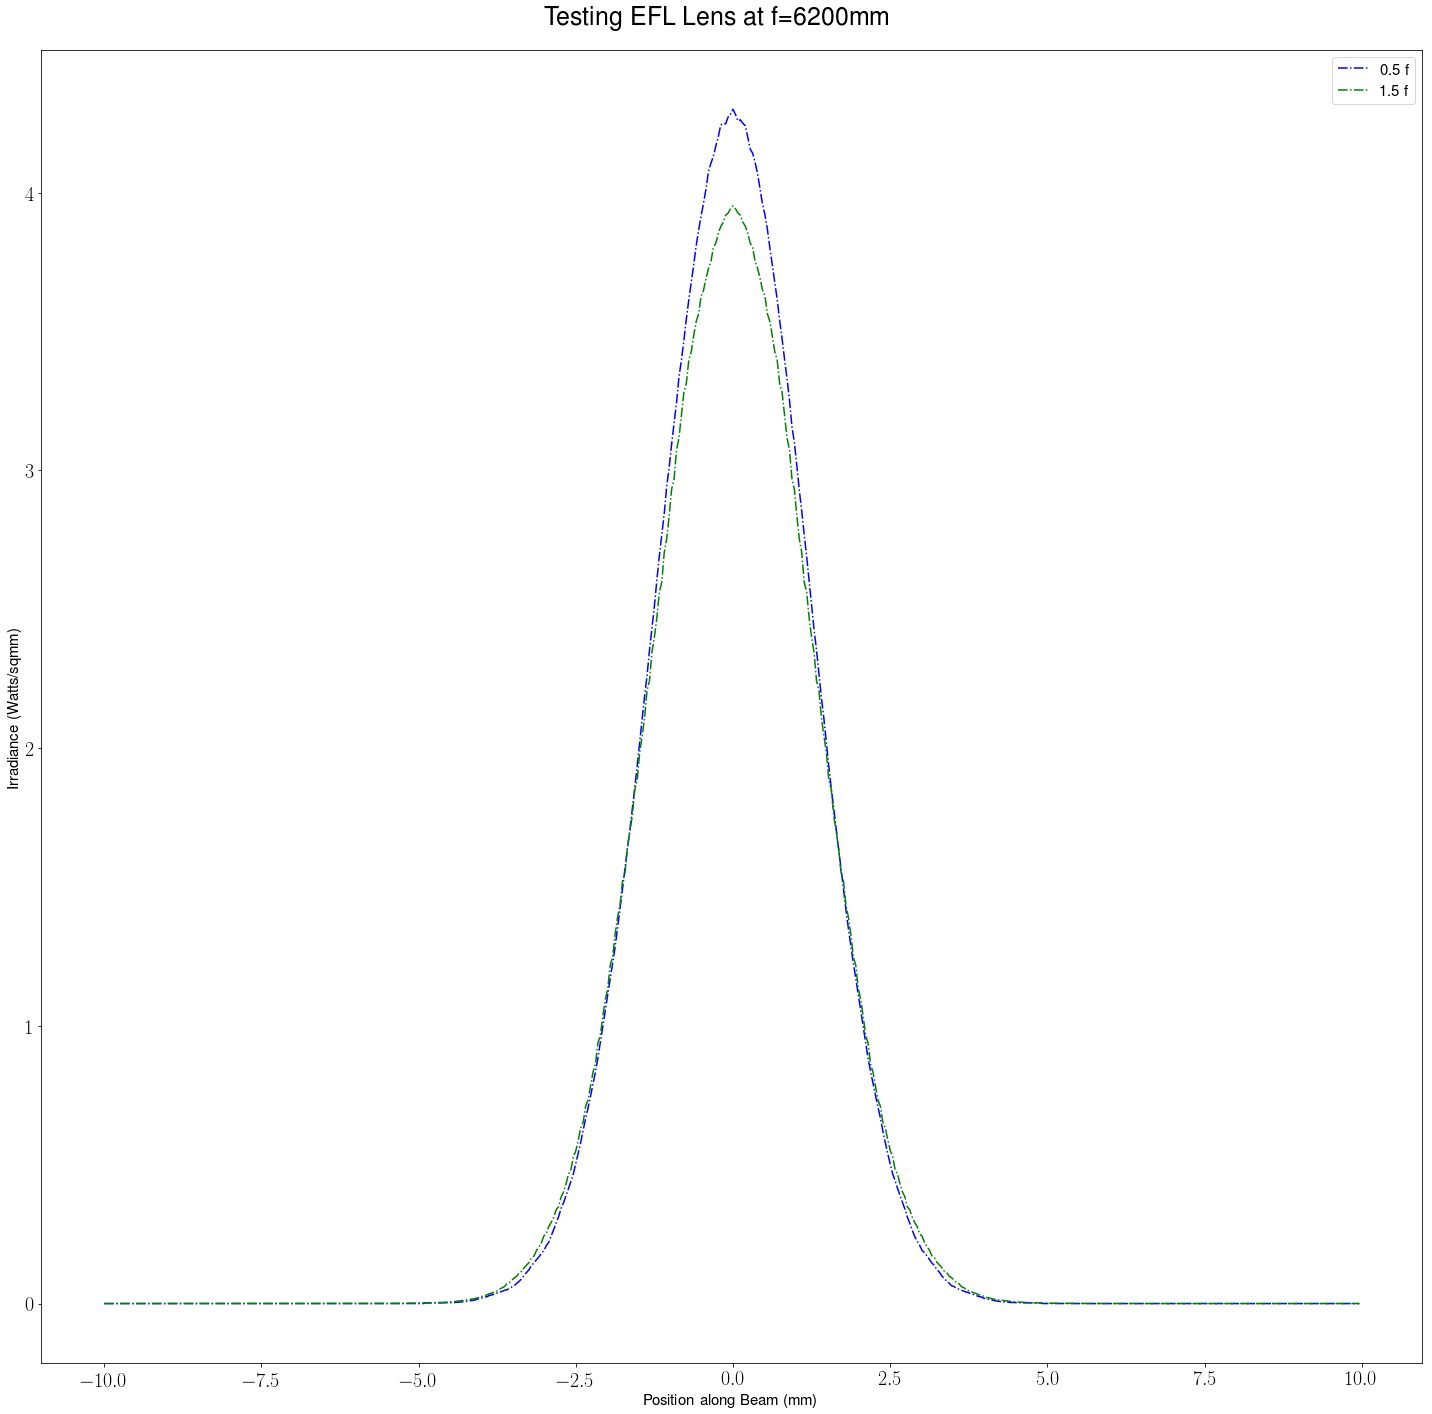

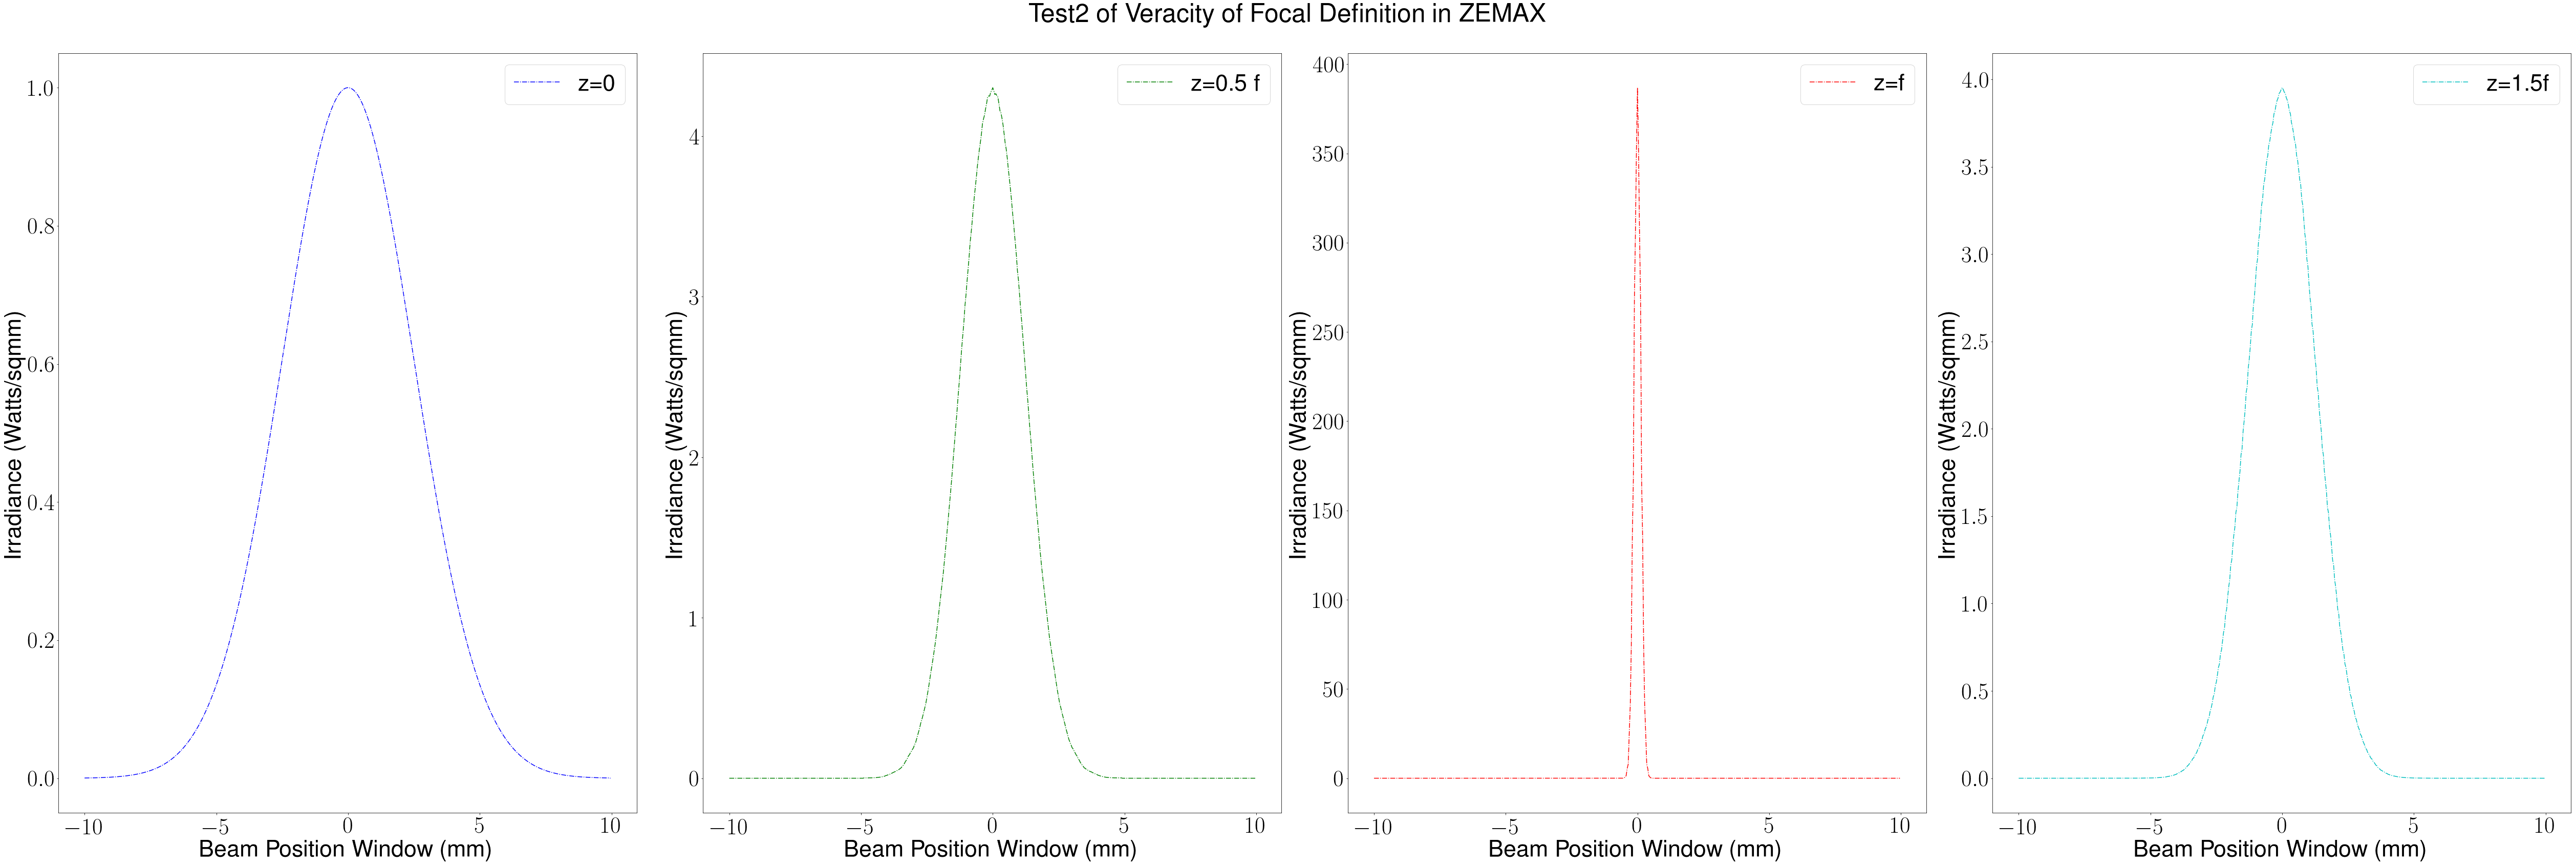

In [9]:
%run '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/utilities.ipynb'

import getpass
import pandas as pd
import subprocess
from subprocess import Popen, PIPE
import os
import glob
import time
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex']=True
matplotlib.rcParams['text.latex.unicode']=True
%matplotlib inline

dataz0 = '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/transport_model/demo_lens/mylens/dataz0.csv'
datamdif= '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/transport_model/demo_lens/mylens/dataz0midf.csv'
dataf = '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/transport_model/demo_lens/mylens/dataz0f.csv'
data1midf = '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/transport_model/demo_lens/mylens/dataz1midf.csv'

datalist = [dataz0, datamdif, dataf, data1midf]
labels = ['z=0', 'z=mid-f', 'z=f', 'z=1.5f']
data_test = data_generator(datalist)

plot_generator(data_test, 2, 4, 
               70, 45,
              0.95, 45, 45, 45, 'Beam Position Window (mm)','Irradiance (Watts/sqmm)',
              'Test of Veracity of Focal Definition in ZEMAX', labels, 'lensgaussbeamtes')

waist = np.multiply(2, fit_parameter_extractor(gaussian,data_test))
print('old lens data:')
print(waist[2])
focal_length = 6200
step = np.divide(focal_length, 2)

fitx_val = np.arange(0, 2*focal_length, step)

numerical_xval = np.arange(0,2*focal_length, 0.01)
numerical_lens_waist = lens_waist_size(numerical_xval, 5, 600, 6200)

minimum_a_waist = lens_waist_size(6200, 5, 600, 6200)
print('analytical expected minimum waist:')
print(minimum_a_waist)


test = plt.figure(figsize=(20,20))
t = test.add_subplot(111)
t.plot(numerical_xval, numerical_lens_waist, linestyle = '-.')
t.scatter(fitx_val, waist[2], color = 'purple')
t.tick_params(axis = 'both', )
t.tick_params(axis='both', labelsize=20)
t.set_xlabel('Position along Beam (mm)', fontsize=20)
t.set_ylabel('$W(z)$ (mm)', fontsize=20)
test.tight_layout()

sample = [datamdif, data1midf]
data_sample = data_generator(sample)
labels_s = ['0.5 f','1.5 f' ]
def plot_in_one(data_arr, figx, figy, top_adjust, label_size,
                labelx_str, labely_str, title_str, label_arr, filename_str):
    cycol = cycle('bgrcmyk')
    fig = plt.figure(figsize=(figx, figy))
    ax = fig.add_subplot(111)
    for pos in range(len(data_arr)):
        print(pos)
        ax.plot(data_arr[pos][0], data_arr[pos][1], c = next(cycol),linestyle = '-.', label = str(label_arr[pos]))
        ax.tick_params(axis='both',labelsize=label_size+5)
        ax.set_xlabel(str(labelx_str), fontsize=label_size)
        ax.set_ylabel(str(labely_str), fontsize=label_size)
        ax.legend(loc = 'upper right', fontsize=label_size)
    
    fig.suptitle(title_str, fontsize=label_size+10)
    fig.tight_layout()
    fig.subplots_adjust(top=top_adjust)
    fig.savefig(filename_str+'.jpg', dp1=1600)
    
plot_in_one(data_sample, 20,20, 0.95, 15, 'Position along Beam (mm)', 'Irradiance (Watts/sqmm)', 'Testing EFL Lens at f=6200mm', labels_s, 'test1me' )


##new data set 

data_at_0 = '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/transport_model/demo_lens/newlens/data_z0.csv'
data_at_midf = '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/transport_model/demo_lens/newlens/data_z.5f.csv'
data_at_f = '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/transport_model/demo_lens/newlens/data_z1f.csv'
data_at_1_5_f = '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/transport_model/demo_lens/newlens/data_z1.5f.csv'

datalist_new = [data_at_0, data_at_midf, data_at_f, data_at_1_5_f]
labels = ['z=0', 'z=0.5 f', 'z=f', 'z=1.5f']

new_dataarr = data_generator(datalist_new)

equi_data = [data_test[1], data_test[3], new_dataarr[1], new_dataarr[3]]
equi_labels = ['z1 =0.5 f','z1 =1.5f''z2 =0.5 f','z2=1.5f' ]



plot_generator(new_dataarr, 2, 4, 
               70, 45,
              0.95, 45, 45, 45, 'Beam Position Window (mm)','Irradiance (Watts/sqmm)',
              'Test2 of Veracity of Focal Definition in ZEMAX', labels, 'lensgaussbeamtes')

#plot_in_one(equi_data, 20,20, 0.95, 15, 'Position along Beam (mm)', 'Irradiance (Watts/sqmm)', 'Testing EFL Lens at f=6200mm', equi_labels, 'test2me' )

new_waist_values = np.multiply(2, fit_parameter_extractor(gaussian, new_dataarr))

print("new values")
print(new_waist_values[2])
